<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/korean_fonts_google_notofonts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트를 인터넷으로 직접 내려받아 사용하기
- 나눔 기본 폰트 이외 다른 폰트를 내려받아 사용할 때 ...


### 글꼴 목록 
- 구글
-- 고딕체 : https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
 -- 명조체 : https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKkr-hinted.zip
- 네이버
-- 나눔고딕 : https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_GOTHIC.zip
-- 나눔명조 : https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_MYUNGJO.zip
-- 나눔바른고딕 : https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_BARUNGOTHIC.zip
-- 나눔스퀘어 : https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_SQUARE.zip
-- 나눔스퀘어라운드 : https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_SQUARE_ROUND.zip
-- 나눔바른펜 : https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_BARUNPEN.zip
-- 나눔펜 : https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_SONGEULSSI.zip

### 글꼴 내려받아 설치하기
- 설치 후 반드시 런타임 다시 시작해야 함.

In [ ]:
import os
 
path = 'https://hangeul.naver.com/api/nanum/font/NanumFontSetup_TTF_SONGEULSSI.zip' # 나눔펜# 다운로드 받기
cmd = 'wget ' + path
os.system(cmd)
# 압축 풀기
cmd = 'unzip ' + cmd[cmd.rfind('/')+1:] + ' -d /usr/share/fonts/truetype'
os.system(cmd)
# 나머지 작업, 반드시 런타임 다시 시작, kaggle : run - restart 메뉴 선택
# kaggle.com에서는 sudo를 제거한다.
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 실행 후 런타임 다시 시작 필요

### 한글 글꼴 사용 설정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
ttf_path = '/usr/share/fonts/truetype/' + 'NanumPen.ttf'
font_name = fm.FontProperties(fname=ttf_path).get_name()
plt.rc('font', family=font_name, size=24)
# 글꼴 종류, 크기 등 글꼴을 개별적으로 지정할 때 사용한다. 함수 내에서 적절한 속성에 지정
fontprop = fm.FontProperties(fname=path, size= 36)
print(font_name)

Nanum Pen Script


### 그래프 예제

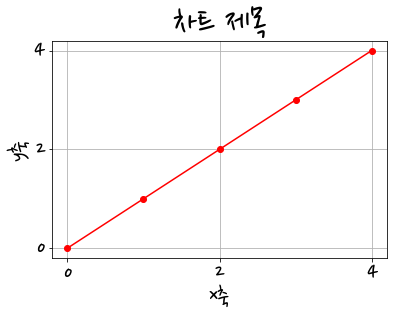

In [ ]:
import matplotlib.pyplot as plt
 
plt.plot(range(5), range(5), 'ro-')
plt.title('차트 제목', fontproperties=fontprop)
plt.ylabel('y축')
plt.xlabel('x축')
plt.grid(True)
plt.show()

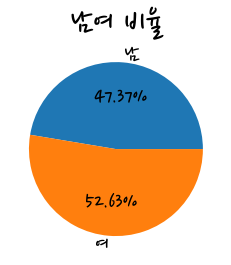

In [ ]:
plt.pie([18, 20], labels=['남','여'], autopct='%.2f%%')
plt.title('남여 비율', fontproperties=fontprop)
plt.show()

### csv 파일처리 예제
- github에서 다운로드한 다음 처리하기

In [ ]:
!wget https://raw.githubusercontent.com/hvyrain/pythonall/main/seoul-utf8.csv

--2021-09-02 12:23:59--  https://raw.githubusercontent.com/hvyrain/pythonall/main/seoul-utf8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212955 (1.2M) [text/plain]
Saving to: ‘seoul-utf8.csv’

seoul-utf8.csv      100%[===================>]   1.16M  --.-KB/s    in 0.05s   

2021-09-02 12:23:59 (21.5 MB/s) - ‘seoul-utf8.csv’ saved [1212955/1212955]



### csv 모듈 사용하기

In [ ]:
import csv
f = open('seoul-utf8.csv')
data = csv.reader(f)
header = next(data)
print(header)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


In [ ]:
count = 0
d = list(data)
while count < 5 :
  print(d[count])
  count += 1

['1907-10-01', '108', '13.5', '7.9', '20.7']
['1907-10-02', '108', '16.2', '7.9', '22']
['1907-10-03', '108', '16.2', '13.1', '21.3']
['1907-10-04', '108', '16.5', '11.2', '22']
['1907-10-05', '108', '17.6', '10.9', '25.4']


In [ ]:
# 기온 전체 평균 구하기
minlist = []
maxlist = []
avglist = []
for i in data :
  if i[3] != '' :
    minlist.append(float(i[3]))
  if i[2] != '' :
    avglist.append(float(i[2]))
  if i[4] !='' :
    maxlist.append(float(i[4]))
 
min_temp = sum(minlist) / len(minlist)
max_temp = sum(maxlist) / len(maxlist)
avg_temp = sum(avglist) / len(avglist)
print(f'{avg_temp:.2f}, {min_temp:.2f}, {max_temp:.2f}')

11.75, 7.46, 16.76


### pandas 활용

In [ ]:
import pandas as pd
 
df = pd.read_csv('https://raw.githubusercontent.com/hvyrain/pythonall/main/seoul-utf8.csv')
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
41154,2021-08-08,108,26.8,24.4,32.1
41155,2021-08-09,108,28.3,23.3,33.6
41156,2021-08-10,108,27.7,24.3,32.2
41157,2021-08-11,108,27.4,24.1,31.6


In [ ]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41159.0,40403.000000,40402.000000,40401.000000
mean,108.0,11.753511,7.459730,16.760996
std,0.0,10.658904,10.884408,10.982077
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.200000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [ ]:
df.iloc[df['최고기온(℃)'].idxmax(), :]

날짜         2018-08-01
지점                108
평균기온(℃)          33.6
최저기온(℃)          27.8
최고기온(℃)          39.6
Name: 40051, dtype: object

In [ ]:
df.iloc[df['최저기온(℃)'].idxmin(), :]

날짜         1927-12-31
지점                108
평균기온(℃)         -15.3
최저기온(℃)         -23.1
최고기온(℃)          -6.4
Name: 7396, dtype: object

In [14]:
d = df.sort_values(by='최고기온(℃)', ascending=False)
d.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
31276,1994-07-23,108,32.6,28.0,38.2
13111,1943-08-24,108,29.0,23.2,38.2


In [15]:
 d = df.sort_values(by='최저기온(℃)', ascending=True)
d.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7396,1927-12-31,108,-15.3,-23.1,-6.4
8503,1931-01-11,108,-17.4,-22.5,-14.7
4478,1920-01-04,108,-14.7,-22.3,-8.5
7401,1928-01-05,108,-15.1,-22.2,-10.6
8502,1931-01-10,108,-18.9,-21.9,-13.0


In [ ]:
!wget https://raw.githubusercontent.com/hvyrain/pythonall/main/age-utf8.csv

--2021-08-28 19:14:40--  https://raw.githubusercontent.com/hvyrain/pythonall/main/age-utf8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1534644 (1.5M) [text/plain]
Saving to: ‘age-utf8.csv’

age-utf8.csv        100%[===================>]   1.46M  --.-KB/s    in 0.04s   

2021-08-28 19:14:41 (35.9 MB/s) - ‘age-utf8.csv’ saved [1534644/1534644]



In [ ]:
df = pd.read_csv('age-utf8.csv')
df = df.set_index('행정구역')
# 광역시도만 가져온다.
df = df[df.index.str.contains('00000000')]
# 행색인을 행정구역에서 (000...)을 제외한 문자열로 지정
df.index = map(lambda x: str(x).split(' ')[0], df.index)
# 인구 합계 제외
df = df.iloc[:, 2:]
# 열 명을 숫자로 변경
col = list(range(101))
df.columns = col
# 세자리 콤마 출력을 위해 변경
df = df.astype(float)
pd.options.display.float_format = '{:,.0f}'.format
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
서울특별시,"44,194","46,684","50,823","53,658","58,598","66,114","68,277","67,147","71,045","73,060","74,505","70,568","71,312","78,110","75,625","71,891","73,626","80,362","80,598","88,355","105,593","114,015","119,841","133,081","143,197","154,798","159,429","166,802","172,314","171,414","157,103","150,890","146,225","137,955","137,040","137,366","134,703","141,294","149,062","157,796",...,"156,403","143,132","136,908","128,712","122,479","127,702","102,754","97,716","96,241","74,157","84,250","81,605","80,834","79,867","56,123","61,007","56,940","61,273","60,396","48,312","42,390","39,165","33,949","29,955","26,125","22,148","17,798","14,590","12,079","9,343","7,947","6,837","5,164","3,771","2,557","1,788","1,365","1,359",823,"2,477"
부산광역시,"14,119","16,182","17,902","20,392","22,824","25,628","26,610","26,101","27,075","27,966","28,203","25,557","25,572","27,351","25,874","24,562","25,057","27,712","27,837","29,934","35,910","38,783","39,170","42,106","43,964","44,828","44,184","44,483","44,628","44,432","40,334","40,088","38,348","36,826","36,783","37,931","38,793","42,252","47,148","51,472",...,"64,732","59,902","57,386","55,827","53,143","55,045","44,289","42,944","42,766","33,988","36,787","35,826","34,556","32,097","21,020","25,770","23,785","26,231","24,653","20,665","18,434","16,721","13,899","12,520","10,724","9,213","7,306","5,839","4,953","3,579","2,929","2,530","2,009","1,302",855,618,412,387,255,756
대구광역시,"10,362","12,348","13,617","15,429","17,416","19,478","20,270","20,012","21,035","21,926","21,922","20,323","20,668","22,499","21,544","20,645","21,199","23,359","23,464","24,954","29,081","31,286","29,829","31,961","32,689","33,096","31,990","31,843","31,775","31,501","28,396","28,375","26,941","25,375","26,130","27,003","26,841","29,255","33,267","36,007",...,"42,791","38,586","34,142","33,808","31,806","31,919","25,734","26,751","26,526","19,774","21,444","22,184","20,347","18,834","11,418","14,358","15,161","16,722","15,691","12,991","11,842","10,875","9,489","8,493","7,566","6,491","5,271","4,183","3,476","2,530","1,934","1,579","1,244",886,534,402,252,216,155,372
인천광역시,"14,548","16,486","18,538","19,578","21,950","24,617","25,946","25,141","26,602","27,691","28,414","26,080","26,428","28,218","27,011","25,631","25,308","27,535","27,436","29,486","33,516","35,424","35,258","37,460","39,362","40,852","41,609","43,007","44,084","43,978","40,285","38,871","37,336","35,804","36,001","37,985","38,101","41,053","45,676","49,525",...,"52,149","46,204","43,005","38,955","35,738","36,429","28,284","26,036","26,111","18,623","21,857","21,202","20,688","20,796","14,077","15,138","14,475","15,876","15,529","12,541","11,169","10,917","9,504","8,395","7,710","6,616","5,310","4,575","3,771","2,946","2,413","2,097","1,516","1,172",781,612,381,393,243,545
광주광역시,"7,589","8,153","9,108","10,188","11,472","13,043","13,466","13,601","14,501","14,882","15,312","14,473","14,483","15,650","15,338","14,395","14,699","15,916","16,392","17,211","20,089","21,038","20,658","21,431","21,678","21,480","20,981","20,464","20,267","19,728","17,633","16,942","16,174","15,819","16,348","17,121","17,256","19,415","21,940","23,900",...,"22,723","20,059","18,605","16,544","15,223","16,028","12,525","11,710","12,397","10,777","11,121","11,113","10,686","10,588","7,508","8,193","7,177","8,267","8,641","6,674","6,052","5,486","5,006","4,367","3,705","3,358","2,816","2,158","1,763","1,434","1,333",954,669,539,362,238,132,221,115,233
대전광역시,"7,304","7,827","8,879","9,789","11,168","12,258","12,917","12,705","13,438","13,853","14,301","13,325","13,464","14,674","14,262","13,438","13,843","15,150","15,075","16,066","18,731","19,619","20,287","21,170","22,048","22,081","21,809","21,704","21,896","21,310","19,595","18,823","18,

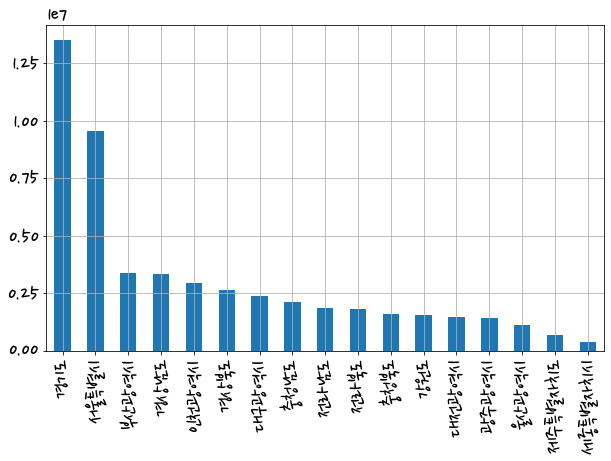

In [ ]:
# 인구합계 역순으로 정렬 후 바그래프 출력
df.sum(axis=1).sort_values(ascending=False).plot.bar(rot=90, grid=True, figsize=(10,6))

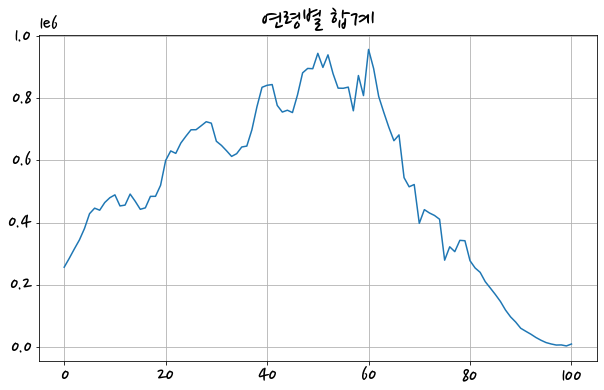

In [ ]:
 # 연령별 합계
df.sum(axis=0).plot(title='연령별 합계', grid=True, figsize=(10,6))

In [ ]:
# 000000 : 구 단위, matching 시켜 가져오기
df = pd.read_csv('age-utf8.csv')

In [ ]:
# 구군 단위만 가져오기
df= df[~df['행정구역'].str.contains(r'0{8}', regex=True)]
df[df['행정구역'].str.contains(r'0{6}', regex=True)]

,행정구역,2021년07월_계_총인구수,2021년07월_계_연령구간인구수,2021년07월_계_0세,2021년07월_계_1세,2021년07월_계_2세,2021년07월_계_3세,2021년07월_계_4세,2021년07월_계_5세,2021년07월_계_6세,2021년07월_계_7세,2021년07월_계_8세,2021년07월_계_9세,2021년07월_계_10세,2021년07월_계_11세,2021년07월_계_12세,2021년07월_계_13세,2021년07월_계_14세,2021년07월_계_15세,2021년07월_계_16세,2021년07월_계_17세,2021년07월_계_18세,2021년07월_계_19세,2021년07월_계_20세,2021년07월_계_21세,2021년07월_계_22세,2021년07월_계_23세,2021년07월_계_24세,2021년07월_계_25세,2021년07월_계_26세,2021년07월_계_27세,2021년07월_계_28세,2021년07월_계_29세,2021년07월_계_30세,2021년07월_계_31세,2021년07월_계_32세,2021년07월_계_33세,2021년07월_계_34세,2021년07월_계_35세,2021년07월_계_36세,...,2021년07월_계_61세,2021년07월_계_62세,2021년07월_계_63세,2021년07월_계_64세,2021년07월_계_65세,2021년07월_계_66세,2021년07월_계_67세,2021년07월_계_68세,2021년07월_계_69세,2021년07월_계_70세,2021년07월_계_71세,2021년07월_계_72세,2021년07월_계_73세,2021년07월_계_74세,2021년07월_계_75세,2021년07월_계_76세,2021년07월_계_77세,2021년07월_계_78세,2021년07월_계_79세,2021년07월_계_80세,2021년07월_계_81세,2021년07월_계_82세,2021년07월_계_83세,2021년07월_계_84세,2021년07월_계_85세,2021년07월_계_86세,2021년07월_계_87세,2021년07월_계_88세,2021년07월_계_89세,2021년07월_계_90세,2021년07월_계_91세,2021년07월_계_92세,2021년07월_계_93세,2021년07월_계_94세,2021년07월_계_95세,2021년07월_계_96세,2021년07월_계_97세,2021년07월_계_98세,2021년07월_계_99세,2021년07월_계_100세 이상
1,서울특별시 종로구 (1111000000),145692,145692,487,524,578,606,698,867,799,853,929,889,990,933,954,1110,1020,1015,992,1102,1109,1397,1668,1862,1994,2176,2423,2588,2535,2583,2666,2544,2293,2155,1957,1907,1869,1773,1792,...,2427,2255,2093,2050,1950,2030,1589,1550,1543,1104,1270,1298,1363,1274,968,1144,1024,1140,1189,969,875,818,697,647,553,476,380,321,259,209,174,152,103,101,68,46,29,26,35,53
19,서울특별시 중구 (1114000000),122951,122951,555,601,576,614,713,698,670,707,658,678,666,589,568,655,645,542,613,722,733,909,1142,1352,1447,1618,1831,1942,2028,2192,2370,2383,2205,2066,2017,1996,1950,1925,1868,...,2110,1945,1886,1865,1765,1804,1426,1341,1362,1055,1199,1125,1169,1160,814,952,902,947,1010,764,698,654,516,511,480,378,315,270,203,181,152,136,117,69,45,33,26,26,20,59
35,서울특별시 용산구 (1117000000),225977,225977,1111,1117,1205,1251,1337,1403,1433,1356,1412,1462,1440,1360,1365,1459,1437,1389,1548,1582,1654,1843,2332,2630,2688,2827,3113,3411,3750,3907,4381,4449,4258,4100,3886,3758,3637,3690,3519,...,3617,3310,3205,2964,2811,2886,2332,2153,2009,1711,1848,1831,1899,1699,1358,1435,1416,1531,1571,1291,1176,1103,1020,918,838,699,565,455,418,297,242,255,168,115,90,66,51,56,40,89
52,서울특별시 성동구 (1120000000),288703,288703,1793,1872,1893,1935,2088,2073,2149,1967,1974,2005,1864,1729,1695,1946,1793,1798,1833,2045,2080,2528,3154,3443,3748,4202,4500,4901,4944,5024,5129,5198,4775,4755,4658,4644,4553,4637,4660,...,4766,4296,4108,3878,3451,3634,2924,2654,2623,2146,2426,2208,2225,2353,1610,1801,1675,1922,1838,1489,1290,1161,1078,968,792,675,572,431,357,263,232,183,143,107,66,44,35,30,26,80
86,서울특별시 동대문구 (1123000000),337946,337946,1572,1725,1787,1891,1965,2171,2242,2086,2265,2208,2266,2127,2089,2347,2157,2100,2153,2316,2519,3060,4023,4550,5152,5880,6106,6293,6231,6070,6038,5842,5283,5060,4882,4599,4624,4641,4601,...,5678,5314,4965,4736,4589,4716,3901,3648,3641,2803,3090,3165,3038,3140,2223,2479,2373,2636,2531,2071,1748,1597,1422,1201,1068,905,706,592,441,336,292,234,186,122,68,60,58,57,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,경상남도 함양군 (4887000000),38736,38736,100,116,132,160,171,174,193,224,248,229,237,267,264,315,300,279,310,311,284,306,373,381,294,305,303,301,277,283,250,244,224,222,199,238,215,225,274,...,910,860,702,784,829,795,559,605,662,484,621,591,562,617,337,515,528,556,626,551,552,525,471,430,389,295,300,203,190,160,109,92,63,64,35,29,19,16,11,15
3771,경상남도 거창군 (4888000000),61478,61478,198,240,275,317,341,381,412,479,445,547,515,504,522,561,531,525,680,689,653,693,709,758,681,615,596,574,542,492,48

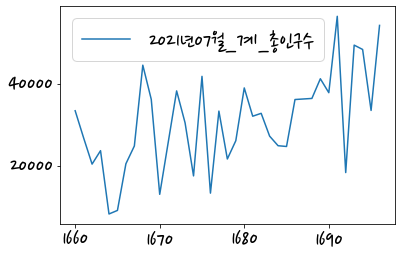

In [ ]:
df[(df['행정구역'].str.contains('4146')) & (~df['행정구역'].str.contains('00000'))].iloc[:,:2].plot()

In [ ]:
%%writefile test.csv
name,score
철수,100
영희,90
길동,
춘향,20

Writing test.csv


In [ ]:
s = pd.read_csv('test.csv')
s

,name,score
0,철수,100
1,영희,90
2,길동,nan
3,춘향,20


In [ ]:
s[s['score'].isna()]

,name,score
2,길동,nan


In [ ]:
s=s.fillna(0)

In [ ]:
s.mean()

score   52
dtype: float64